In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [9]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,income,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df.describe(include='all')

,gender,income,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [12]:
df['mean_score'] = (df['math_score'] + df['reading_score'] + df['writing_score'])/3

In [13]:
df.head()

,gender,income,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,mean_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [14]:
grouped_df = df.groupby(['lunch','test_preparation_course'])
group_s_n = grouped_df.get_group(('standard','none'))
group_s_c = grouped_df.get_group(('standard','completed'))
group_f_n = grouped_df.get_group(('free/reduced','none'))
group_f_c = grouped_df.get_group(('free/reduced','completed'))

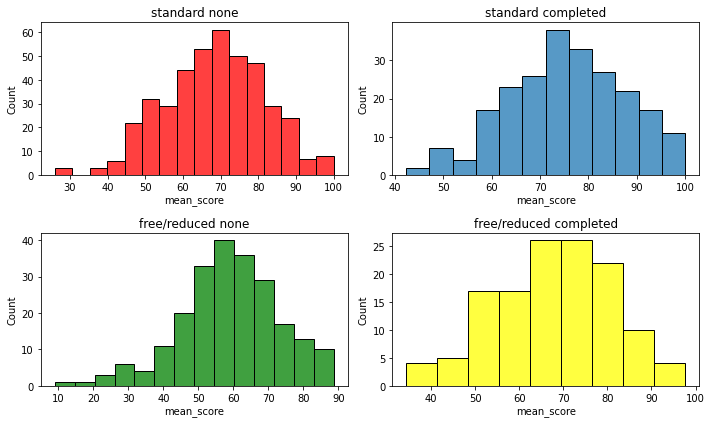

In [15]:
f,ax=plt.subplots(2,2,figsize=(10,6))
sns.histplot(data = group_s_n,x ='mean_score', ax = ax[0][0], color = 'red')
ax[0][0].set_title('standard none')
sns.histplot(data = group_s_c,x ='mean_score', ax = ax[0][1])
ax[0][1].set_title('standard completed')
sns.histplot(data = group_f_n,x ='mean_score', ax = ax[1][0], color = 'green')
ax[1][0].set_title('free/reduced none')
sns.histplot(data = group_f_c,x ='mean_score', ax = ax[1][1], color = 'yellow')
ax[1][1].set_title('free/reduced completed')
f.tight_layout()

In [16]:
import pylab as py
from scipy import stats
from scipy.stats import zscore

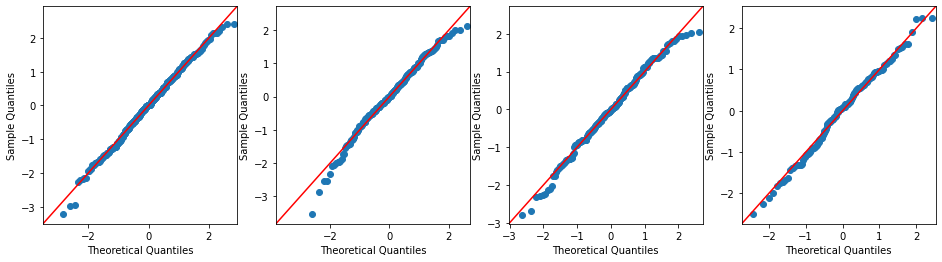

In [17]:
f,ax=plt.subplots(1,4,figsize=(16,4))
sm.qqplot(zscore(group_s_n['mean_score']), line ='45', ax = ax[0]) 
sm.qqplot(zscore(group_f_n['mean_score']), line ='45', ax = ax[1])
sm.qqplot(zscore(group_s_c['mean_score']), line ='45', ax = ax[2]) 
sm.qqplot(zscore(group_f_c['mean_score']), line ='45', ax = ax[3])
py.show() 

## Проверка гипотезы о равенстве дисперсий
H0 : Дисперсия среди каждой группы равна.<br>
H1 : По крайней мере, одна группа имеет дисперсию, не равную остальным. <br><br>
Уровень значимости а = 0.05

##### Группы разделенные по признаку : «Обед» и «Подготовительный курс» 

In [38]:
stats.bartlett(group_s_n['mean_score'], group_f_n['mean_score'], group_s_c['mean_score'],group_f_c['mean_score'])

BartlettResult(statistic=6.141605311197307, pvalue=0.10492042742392421)

__pvalue > a (0.10 > 0.05)__ <br>
Принимается Н0 гипотеза о равенстве дисперсий в группах

##### Группы разделенные по признаку : «Пол» 

In [39]:
gndrs = [x for _,x in df.groupby('gender')['mean_score']]
stats.bartlett(gndrs[0],gndrs[1])

BartlettResult(statistic=1.771784302598282, pvalue=0.1831614116182302)

__pvalue > a (0.18 > 0.05)__ <br>
Принимается Н0 гипотеза о равенстве дисперсий в группах

##### Группы разделенные по признаку : «Доходы»

In [40]:
dfs = [x for _,x in df.groupby('income')['mean_score']]
stats.bartlett(dfs[0],dfs[1],dfs[2],dfs[3],dfs[4])

BartlettResult(statistic=3.188568351064745, pvalue=0.5267793311791109)

__pvalue > a (0.52 > 0.05)__ <br>
Принимается Н0 гипотеза о равенстве дисперсий в группах

##### Группы разделенные по признаку : «Образование родителей»

In [41]:
dfs = [x for _,x in df.groupby('parental_level_of_education')['mean_score']]
stats.bartlett(dfs[0],dfs[1],dfs[2],dfs[3],dfs[4],dfs[5])

BartlettResult(statistic=2.6695466937765926, pvalue=0.7507720491700818)

__pvalue > a (0.75 > 0.05)__ <br>
Принимается Н0 гипотеза о равенстве дисперсий в группах

***

## Апостериорные критерии для однофакторного дисперсионного анализа
После установки факта о различии средних в группах, чтобы ответить на вопрос какие именно средние различаются использую __критерий Тьюки__ (критерий достоверно значимой разности).

##### Группы разделенные по признаку : «Образование родителей»

In [42]:
tukey = pairwise_tukeyhsd(endog=df['mean_score'],
 groups=df['parental_level_of_education'],
 alpha= 0.05 )
print(tukey)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2      meandiff p-adj   lower    upper  reject
----------------------------------------------------------------------------
associate's degree bachelor's degree   2.3547 0.6743  -2.1739  6.8832  False
associate's degree       high school  -6.4721    0.0 -10.3682 -2.5761   True
associate's degree   master's degree   4.0298 0.3567  -1.7924   9.852  False
associate's degree      some college  -1.0927 0.9618  -4.8488  2.6635  False
associate's degree  some high school  -4.4611 0.0183  -8.4541  -0.468   True
 bachelor's degree       high school  -8.8268    0.0 -13.4584 -4.1952   True
 bachelor's degree   master's degree   1.6751 0.9748  -4.6629  8.0132  False
 bachelor's degree      some college  -3.4473 0.2479   -7.962  1.0673  False
 bachelor's degree  some high school  -6.8157 0.0006 -11.5293 -2.1022   True
       high school   master's degree  10.5019    0.0   4.5992 16.4047   True

##### Группы разделенные по признаку : «Доходы»

In [43]:
tukey = pairwise_tukeyhsd(endog=df['mean_score'],
 groups=df['income'],
 alpha= 0.05 )
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
group A group B   2.4759 0.6447 -2.4495  7.4014  False
group A group C   4.1392 0.1006 -0.4577   8.736  False
group A group D   6.1869 0.0031  1.4823 10.8915   True
group A group E   9.7599    0.0  4.5614 14.9583   True
group B group C   1.6632 0.6953 -1.8508  5.1772  False
group B group D    3.711 0.0445  0.0571  7.3649   True
group B group E    7.284    0.0  3.0129  11.555   True
group C group D   2.0477 0.4036 -1.1494  5.2448  False
group C group E   5.6207 0.0008  1.7333  9.5082   True
group D group E    3.573 0.1076 -0.4414  7.5873  False
------------------------------------------------------


***

## Многофакторный дисперсионный анализ 
H0_1 : Тип обеда не влияет на средний балл учащегося.<br>
H0_2 : Прохождение подготовительного курса не влияет на средний балл учащегося.<br>
H0_3 : Взаимодействие факторов не влияет на средний балл учащегося.<br><br>
Уровень значимости а = 0.05

In [44]:
model = ols('math_score ~ C(lunch) + C(test_preparation_course) + C(lunch):C(test_preparation_course)', 
            data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(lunch),28776.698009,1.0,148.052516,7.428461e-32
C(test_preparation_course),7751.820403,1.0,39.882147,4.057922e-10
C(lunch):C(test_preparation_course),68.513615,1.0,0.352494,5.528395e-01
Residual,193590.707144,996.0,NaN,NaN


В первых двух случаях мы отвергаем H0 гипотезу, в третьем принимаем. __=>__

__Тип обеда значимо влияет на средний балл учащегося. <br>
Прохождение подготовительного значимо курса влияет на средний балл учащегося. <br>
Взаимодействие факторов не влияет на средний балл учащегося__